1. Import Required Libraries

In [1]:
!pip install shapely
!pip install geopandas



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px



2. Loading the dataset

In [2]:
data_df = pd.read_csv("data.csv")
data_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [3]:
df = data_df.drop(labels= ['Unnamed: 0'], axis=1) 
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


3. Exploratory Data Analysis

In [4]:
# The usual EDA to learn more about your dataset
# data_df.head()
# data_df.tail()
# data_df.shape()
# data_df.info()
# data_df.describe()
# data_df.dtypes()
# data_df.columns()
# data_df.isnull().sum()

In [5]:
data_df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [6]:
data_df.tail()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN
16511,2575,-124.13,40.80,31.0,2152.0,462.0,1259.0,420.0,2.2478,81100.0,NEAR OCEAN


In [7]:

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [8]:
data_df.describe()


,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
data_df.dtypes

Unnamed: 0              int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [10]:
data_df.shape

(16512, 11)

In [11]:

data_df.isnull().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We can observe that in total bedrooms we have a lot of null data to clean or to remplace with medianes

In [12]:
data_df.columns

Index(['Unnamed: 0', 'longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:
data_no_duplicates = data_df.drop_duplicates()

In [14]:
data_no_duplicates.info()
# at the start we know we had 16512 rows × 11 columns
# it's the same value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.5+ MB


3. Exploratory Data VIZ

In [15]:
# First thing is see your outliers with a boxplot, then pairplot and pairgrid plus a heatmap

In [16]:
# Realized that I have a column with strings(get another df without them)
# Cant do a focking drop so maybe time to do somme new dataframes 
# with precise columns to use for some functions
# NOPE Alexis was able to do it wit a scaler : Min Max 

# exemple scale the data
# min_max_scaler = MinMaxScaler()
# df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df.iloc[:, 1:-1]))
# df_scaled.columns = df.columns[1:-1]
# df_scaled['Class'] = df['Class']

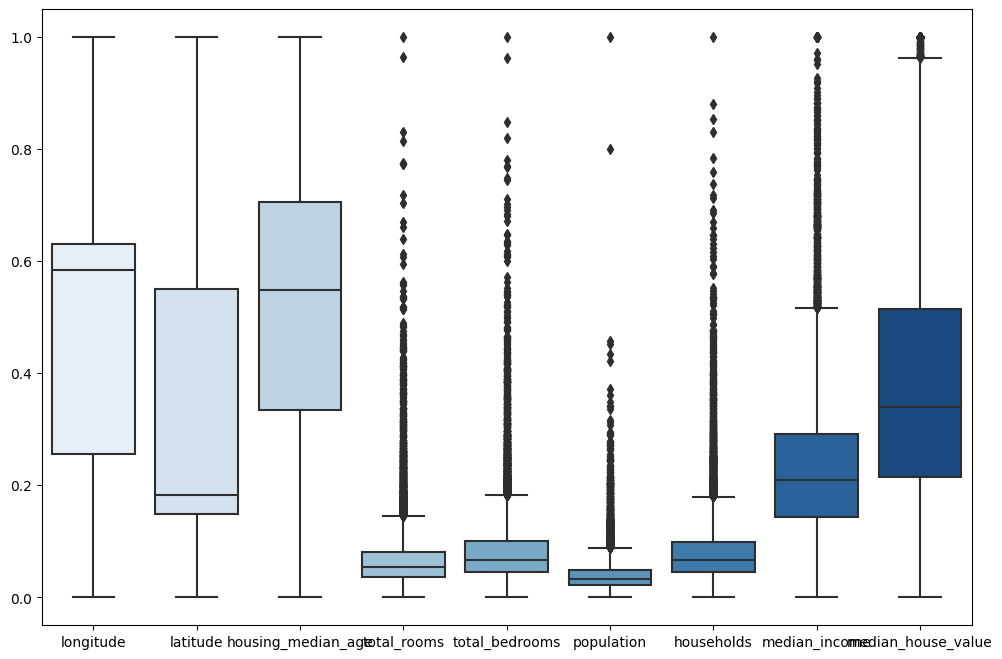

In [17]:
min_max_scale = MinMaxScaler()

df_scale = pd.DataFrame(min_max_scale.fit_transform(data_no_duplicates.iloc[:, 1: -1]))
df_scale.columns = data_no_duplicates.columns[1:-1]
plt.figure(figsize=(12, 8))

sns.boxplot( data= df_scale, palette="Blues");
plt.show()

We observe a lot of outliers in total_rooms and total_bedrooms but should we really get them out?
I think, or I suppose at least that the dataset we'll have to test will also have a lot of outliers
Which means I should conserve the two kind of data and train plus test the two 

For the population it seems it would be sparse in rich areas therefore they must be fewer too
So we shouldn't pick them out

Median income outliers and households have the same analysis for me

In [18]:
# Let's do some correlation and a heatmap

# Do I do it with scaled data or not?

# Maybe I should try the two!

<Figure size 2000x2000 with 0 Axes>

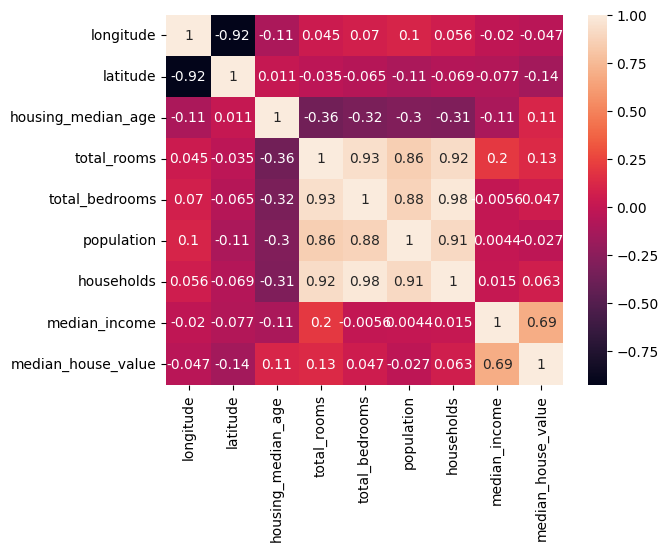

<Figure size 2000x2000 with 0 Axes>

In [19]:
corr_df = df_scale.corr()
sns.heatmap(corr_df, annot=True)
plt.figure(figsize=(20,20))


<Figure size 2000x2000 with 0 Axes>

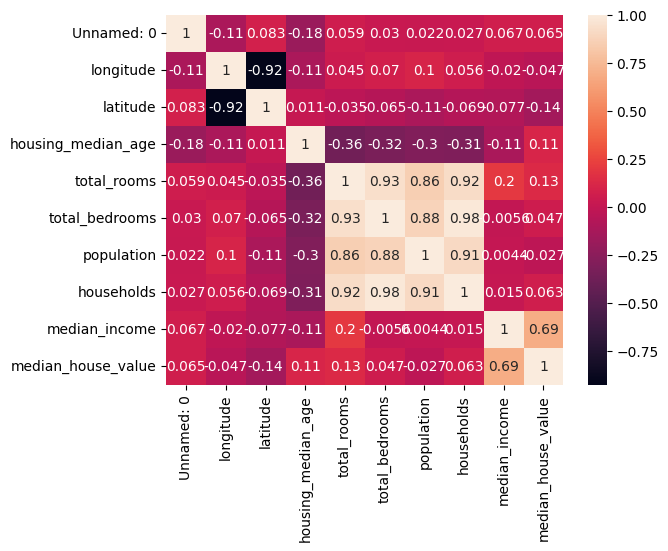

<Figure size 2000x2000 with 0 Axes>

In [20]:
# Correlation on the non scaled df

corr_df_2 = data_no_duplicates.corr()
sns.heatmap(corr_df_2, annot=True)
plt.figure(figsize=(20,20))

We have huge correlation with those:
    rooms
    bedrooms
    households
    population
    
But the intresting part is the longitude and latitude
Huge NEGATIVE correlation to explore (seaside)

Correlation equally observed with median income and median house value

In [21]:
# Let's plot some more with a pair grid and pairplot

# Or should I do a map?? Let's ask Ahmed later

# Let's not try to understand what's the long and lat and try to understand it throught the data

# Pairplot take SOOOOOOOO Loooong, hope i don't crash anything...

<Figure size 2000x2000 with 0 Axes>

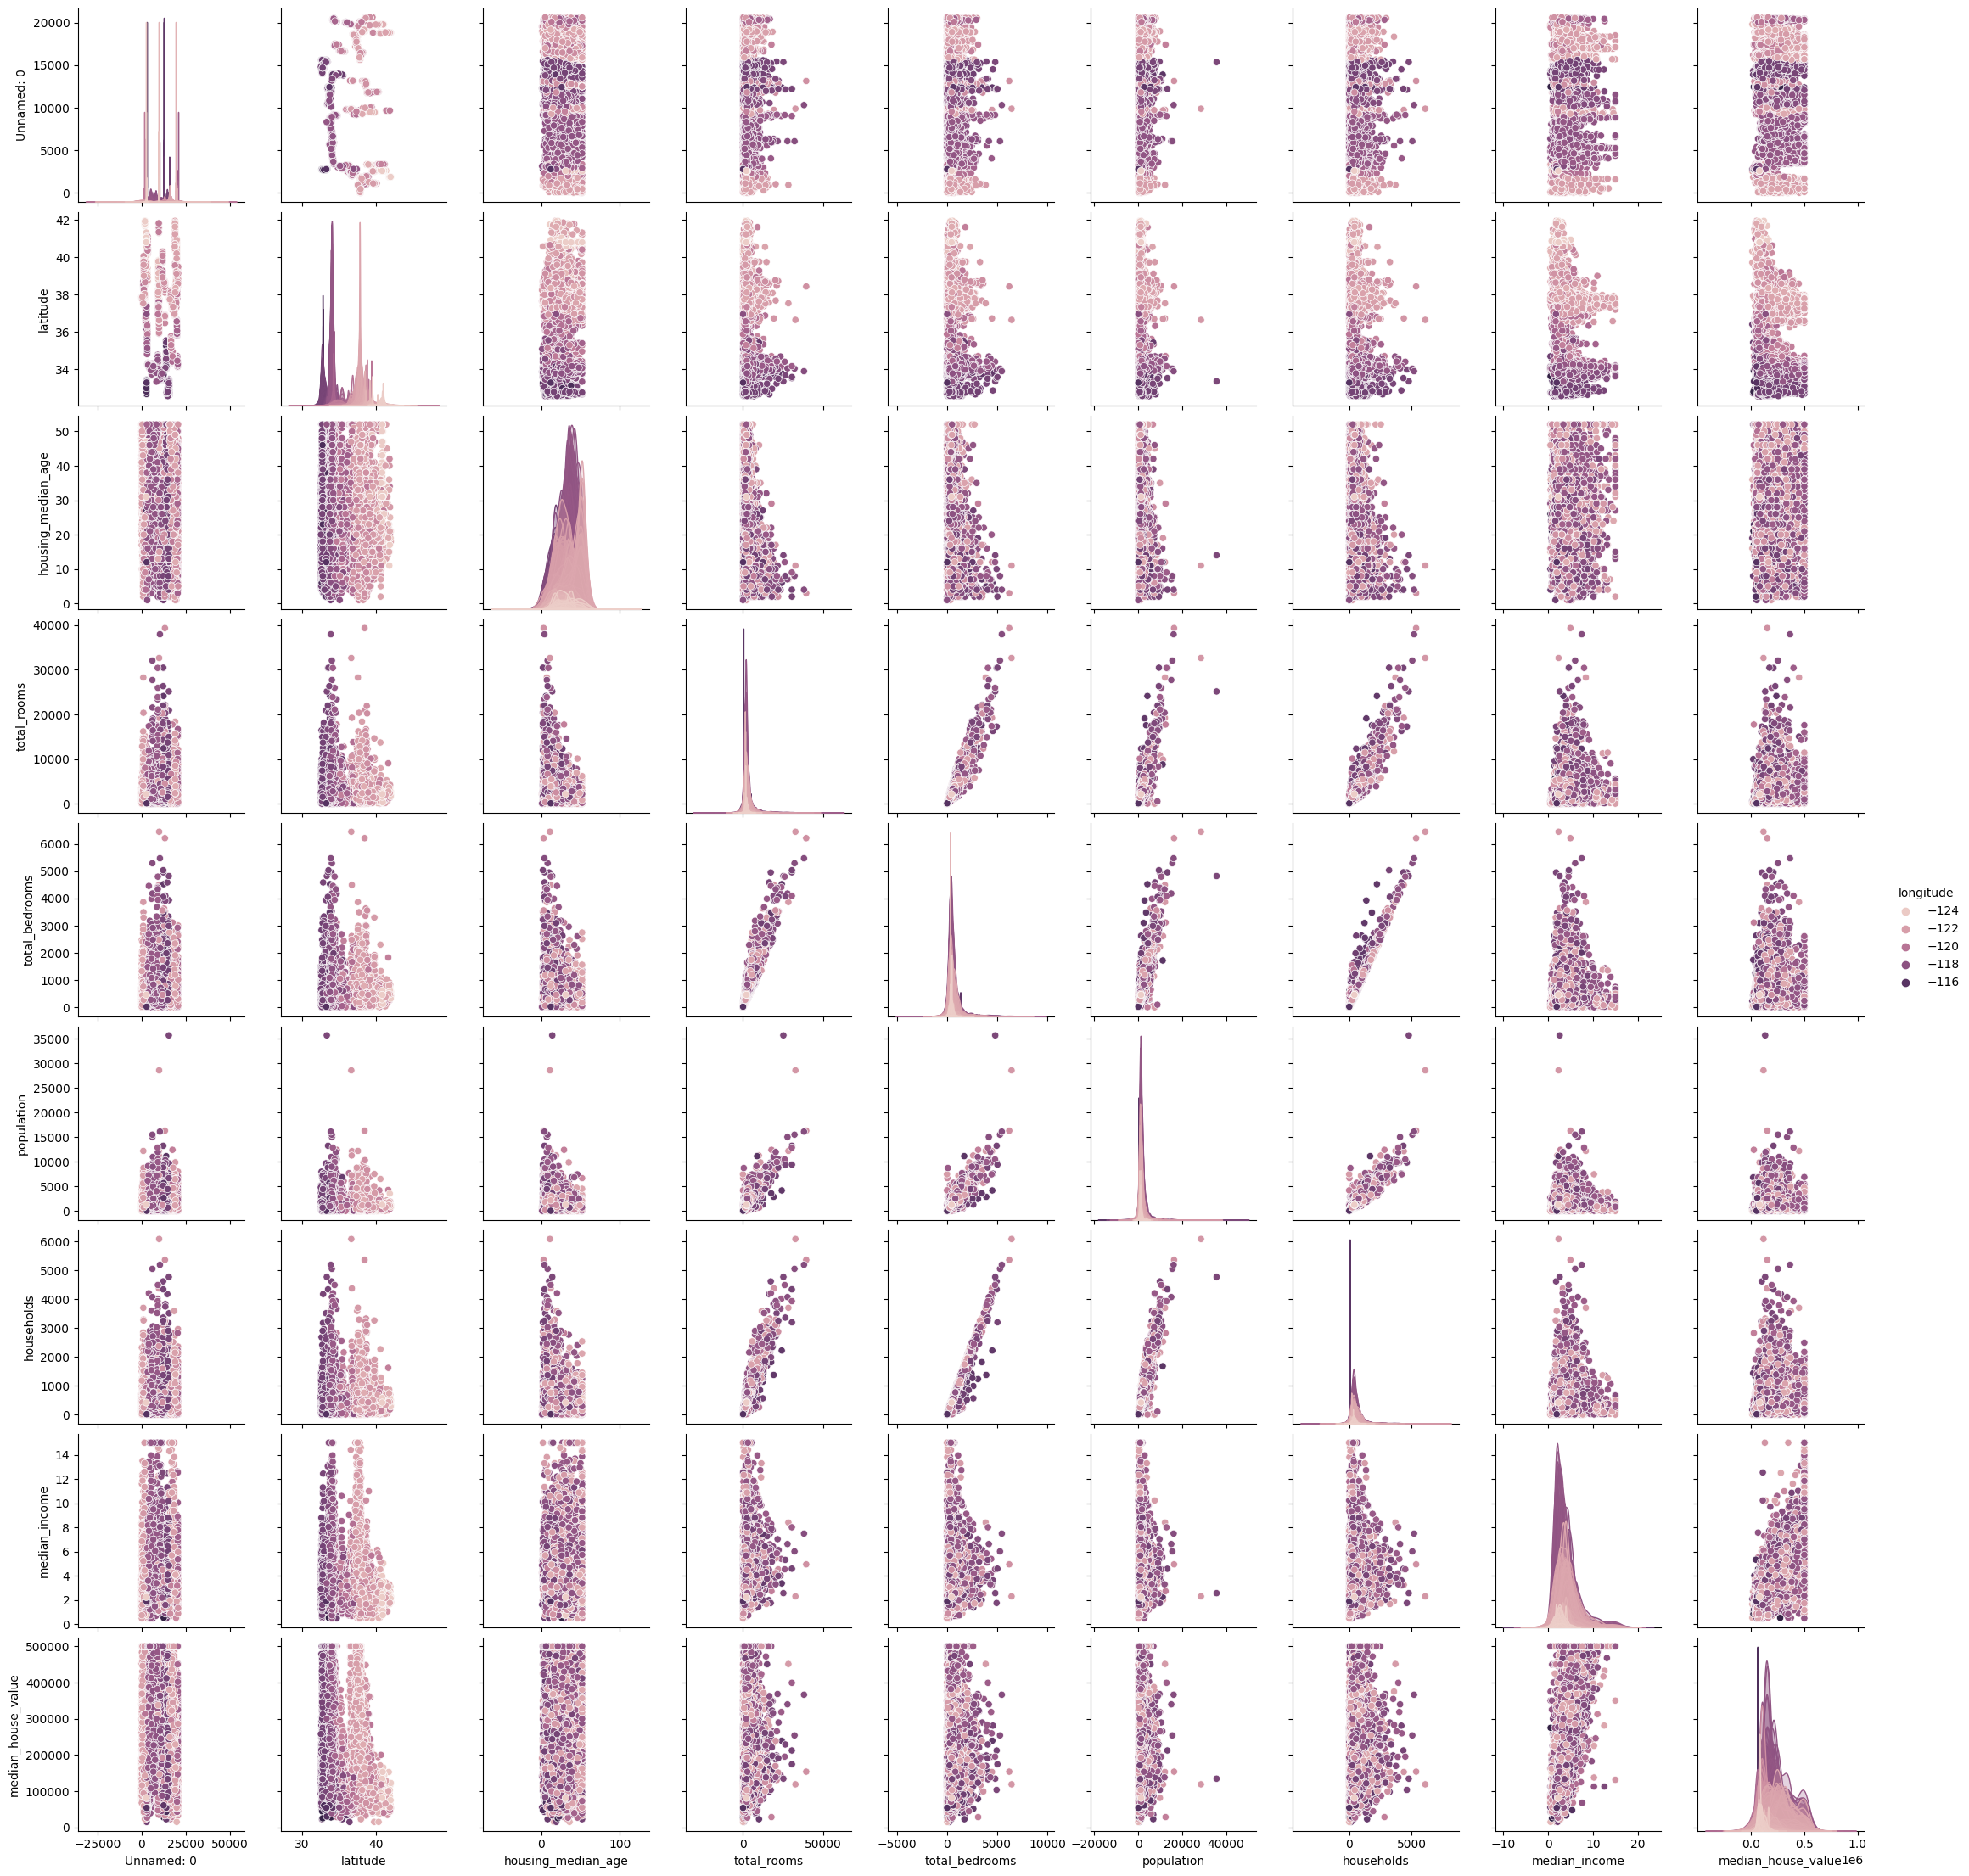

In [22]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data_no_duplicates,hue="longitude")

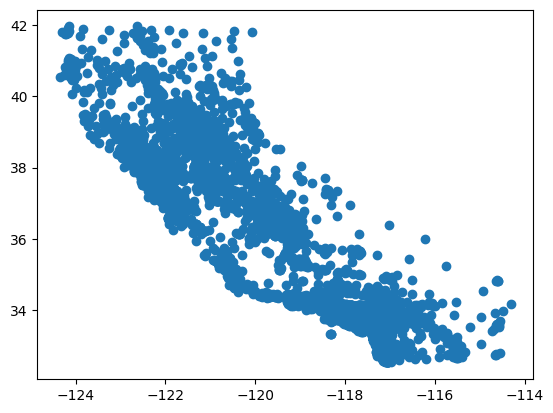

In [23]:
# A little test to plot a cartography with laitude and longitude

plt.scatter(x=data_no_duplicates['longitude'], y=data_no_duplicates['latitude'])
plt.show()

We have some kind of visual but it looks more like a regression than a card

In [24]:
# Had to install geopandas and shapely!!!

In [25]:
# Example of cartography from stackoverflow

# geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
# gdf = GeoDataFrame(df, geometry=geometry)   

# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

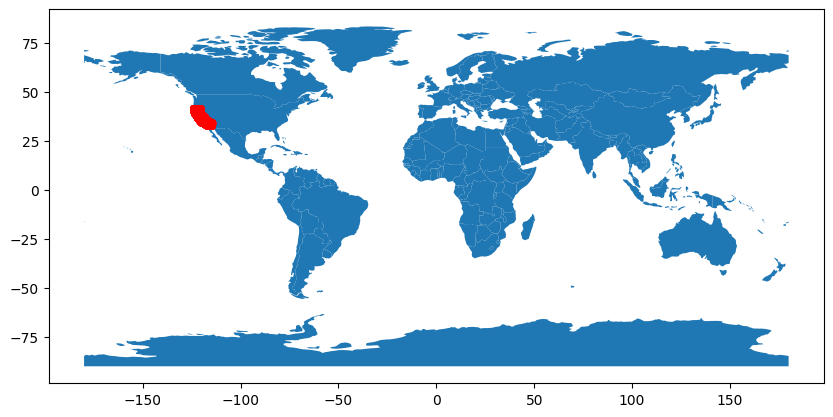

In [26]:
# Doesn't focking work so I had 
# to drop the unnamed fockin column and then start over 
# respecting their code since mine was shaite


geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])] 
gdf = GeoDataFrame(df, geometry = geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [27]:
# naturalearth_cities and nybb is a dataset from gpd but USELESS

In [28]:
# Another code from Stackoverflow

# fig = px.scatter_geo(df,lat='lat',lon='long', hover_name="id")
# fig.update_layout(title = 'World map', title_x=0.5)
# fig.show()

In [30]:
# FLEX MAP
# TOO MUCH BUGGGING, NOPE


# fig = px.scatter_geo(df, lat='latitude', lon='longitude')
# fig.update_layout(title = 'World map', title_x=0.5)
# fig.show()

In [ ]:
'''Next steps:

1 separate df with outliers and without
categories scoring for the tenth column
explore how median income is distributed and what could be intresting

We have huge correlation with those: rooms bedrooms households population

But the intresting part is the longitude and latitude Huge NEGATIVE correlation to explore (seaside)

Correlation equally observed with median income and median house value


Arturo indique que je dois voir la loi normale sur mes features notamment sur les valeurs avec gros outliers

NE PAS UTILISER DE SCALER SANS RAISON PRECISE

JAMAIS FIT SUR LE TEST
FIT SUR TRAIN ET TRANSFORM SUR MON TEST'''